<a href="https://colab.research.google.com/github/dharmendra7/predict_the_co2_emission/blob/main/Co2Emmission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install scikit-learn

In [5]:
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
%matplotlib inline

The %matplotlib inline command is specific to Jupyter Notebook and JupyterLab environments. It is known as a "magic command" and is used to enable the inline display of matplotlib plots within the notebook itself.

When you execute %matplotlib inline in a Jupyter Notebook cell, it configures the notebook to display matplotlib plots directly below the code cell. This means that when you create a plot using matplotlib, it will be rendered and shown immediately in the output area of the notebook.

In [1]:
path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

In [16]:
import requests
response = requests.get(path)
if response.status_code == 200:
    with open("FuelConsumption.csv", "wb") as f:
      f.write(response.content)
else:
    print('request is not working')


In [17]:
df = pd.read_csv('/content/FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [18]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Select the features to explore more

In [19]:
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


We can plot each of these features:

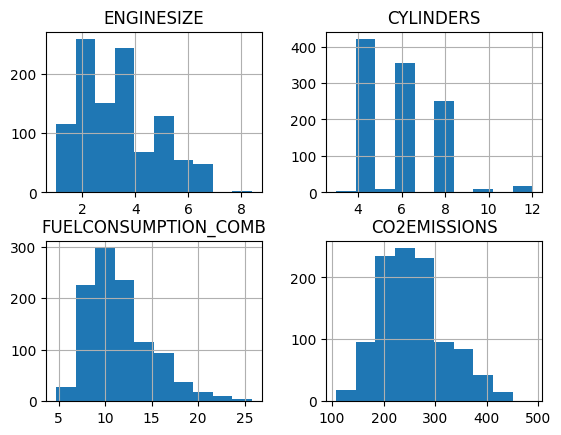

In [20]:
viz = cdf[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
viz.hist()
plt.show()

Now, let's plot each of these features against the Emission, to see how linear their relationship is:

In [ ]:
plt.scatter(cdf['FUELCONSUMPTION_COMB'], cdf['CO2EMISSIONS'], c='blue')
plt.xlabel('fuelconsumption_comb')
plt.ylabel('co2emmission')
plt.show()

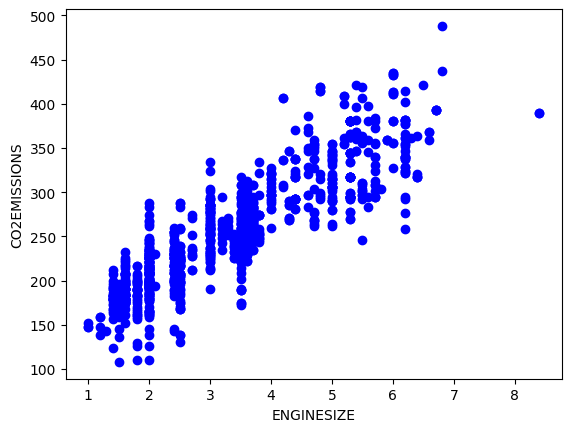

In [29]:
plt.scatter(cdf['ENGINESIZE'], cdf['CO2EMISSIONS'], c='blue')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

Let's split our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for testing. We create a mask to select random rows using np.random.rand() function:

In [27]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

      ENGINESIZE  CYLINDERS  FUELCONSUMPTION_COMB  CO2EMISSIONS
1            2.4          4                   9.6           221
8            3.7          6                  11.6           267
12           5.9         12                  15.6           359
22           2.0          4                  10.0           230
26           3.0          6                  10.9           251
...          ...        ...                   ...           ...
1034         1.8          4                   8.2           189
1035         1.8          4                   8.2           189
1037         2.0          4                   9.0           207
1042         1.4          4                   5.4           124
1064         3.0          6                  11.8           271

[231 rows x 4 columns]


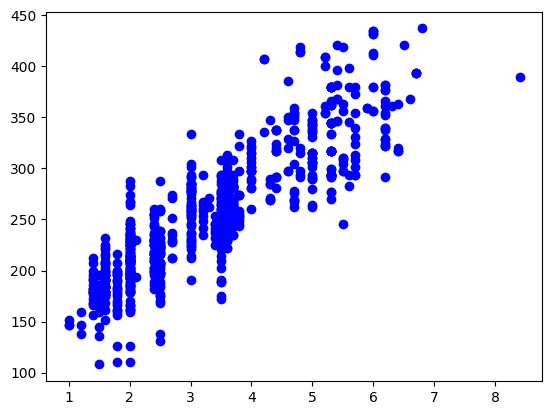

In [44]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, c='blue')

plt.show()

**Modeling**

Using sklearn package to model data.



These lines convert the "ENGINESIZE" and "CO2EMISSIONS" columns from the train dataset into NumPy arrays. This is necessary because scikit-learn expects the input features (train_x) and target variable (train_y) to be in NumPy array format.

In [45]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
x_train = np.asanyarray(train[['ENGINESIZE']])
y_train = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(x_train, y_train)

# The coefficients

print('slop : ' ,regr.coef_)
print('intercept : ', regr.intercept_)


slop :  [[39.21556838]]
intercept :  [125.88797253]


As mentioned before, Coefficient and Intercept in the simple linear regression, are the parameters of the fit line. Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directly from our data. Notice that all of the data must be available to traverse and calculate the parameters.

Text(0, 0.5, 'CO2 EMISSIONS')

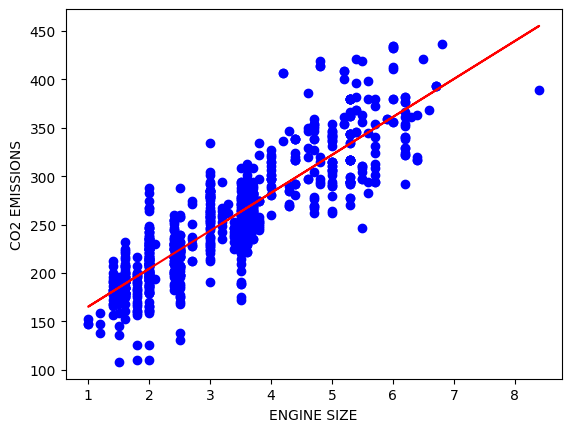

In [46]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, c='blue')
plt.plot(x_train, regr.intercept_[0] + regr.coef_[0][0] * x_train, '-r')
plt.xlabel('ENGINE SIZE')
plt.ylabel('CO2 EMISSIONS')


plt.plot(x_train, regr.intercept_[0] + regr.coef_[0][0] * x_train, '-r')


This line plots the line representing the linear regression model's fit on the training data. It uses the plot() function to draw the line. The x-values are given by train_x, which represents the "ENGINESIZE" values from the training data. The y-values are calculated by multiplying each "ENGINESIZE" value by the coefficient (regr.coef_[0][0]) and adding the intercept term (regr.intercept_[0]). The line is plotted with a red color ('-r').

**Evaluation**


We compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set:

**Mean Absolute Error**:

It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.

**Mean Squared Error (MSE)**:

Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean Absolute Error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.

**Root Mean Squared Error (RMSE)**.

R-squared is not an error, but rather a popular metric to measure the performance of your regression model. It represents how close the data points are to the fitted regression line. The higher the R-squared value, the better the model fits your data. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

In [47]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 25.87
Residual sum of squares (MSE): 1152.60
R2-score: 0.76


Now, Let's see what the evaluation metrics are if we trained a regression model using the FUELCONSUMPTION_COMB feature.


Mean absolute error: 25.87
Residual sum of squares (MSE): 1152.60
R2-score: 0.76

In [49]:
x_train = np.asanyarray(train[['FUELCONSUMPTION_COMB']])
y_train = np.asanyarray(train[['CO2EMISSIONS']])

regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

print('slop  : ', regr.coef_)
print('intercept : ', regr.intercept_)

slop  :  [[16.19936612]]
intercept :  [68.86660431]


In [54]:
first_row_data = regr.intercept_[0] + regr.coef_[0][0]*9.5
first_row_data

222.76058240624405

Text(0, 0.5, 'Co2 emission')

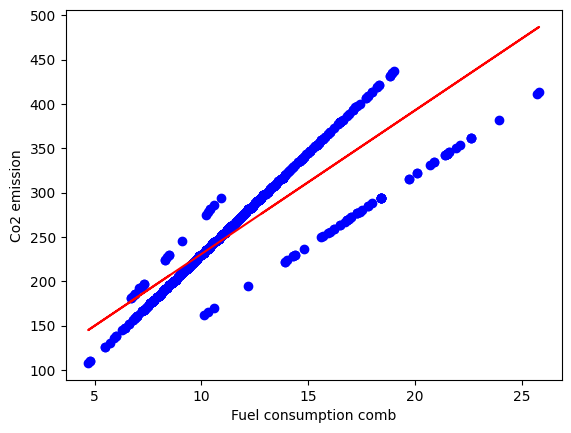

In [50]:
plt.scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS, c='blue')
plt.plot(x_train, regr.intercept_[0] + regr.coef_[0][0]*x_train, '-r')
plt.xlabel('Fuel consumption comb')
plt.ylabel('Co2 emission')

In [51]:
from sklearn.metrics import r2_score

x_test = np.asanyarray(test[['FUELCONSUMPTION_COMB']])
y_test = np.asanyarray(test[['CO2EMISSIONS']])
p_y_test = regr.predict(x_test)

print('mean absolute error : %.2f' %np.mean(np.absolute(p_y_test - y_test)))
print('residual sum squared error MSE : %.2f'% np.mean((p_y_test - y_test) ** 2) )
print('R2-Score : %.2f'% r2_score(y_test, p_y_test))

mean absolute error : 23.20
residual sum squared error MSE : 987.48
R2-Score : 0.80
